<a href="https://colab.research.google.com/github/DA24B020/Project-SMAC/blob/main/Ayush/Tasks/Problems_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task_0 :

Determine the value of π using Monte-Carlo technique as described here. Choose a box of size 100x100 and draw a circle of known diameter inside it, perhaps using the centre of the square as the origin of the circle. Make sure that the circle is completely inside the square. Generate
a pair of random numbers in the range 0 to 100 and use them as the coordinates of a point. If the point is located within the circle, increment the counter “inside”. If the point is located outside the
circle, increment the counter “outside”. Repeat this a large number of times, say, about 1000 or so.

Evaluate the ratio of the counters “inside” to “outside”. If the random number generation was uniform within the range provided, then the ratio of the counters should be related to the ratio of the areas of circle and the square. Based on this numerical experiment, comment on the value of π you have obtained. Suggest what can be done to improve the accuracy of the value of π.


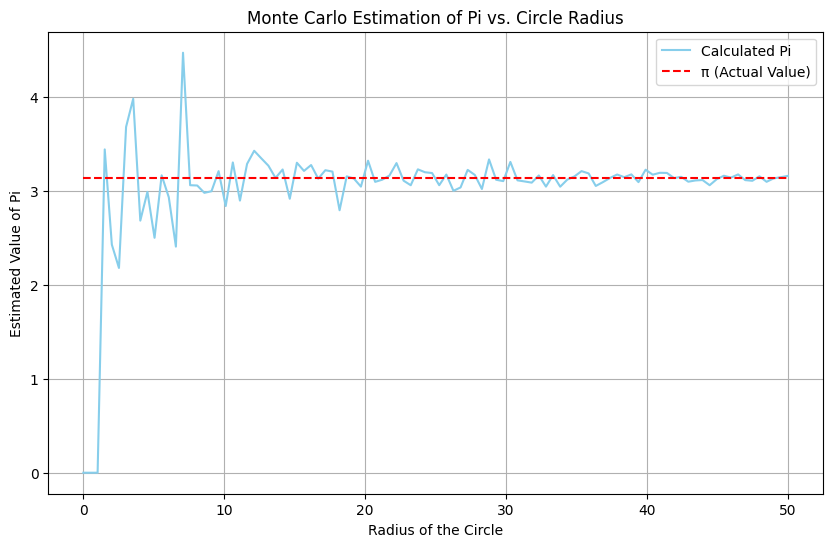

In [8]:
import numpy as np
import matplotlib.pyplot as plt

radius = np.linspace(0.01, 50, 100)
pi = []

for j in range(len(radius)):
    inside = 0
    outside = 0

    for i in range(5000):

        x = np.random.uniform(0, 100)
        y = np.random.uniform(0, 100)

        if ((x - 50)**2 + (y - 50)**2 < radius[j]**2):
            inside += 1
        else:
            outside += 1

    if outside == 0:
        ratio = float('inf')
    else:
        ratio = inside / outside

    prob = ratio / (ratio + 1)

    pi.append(prob * (100 / radius[j])**2)

pi = np.array(pi)
plt.figure(figsize=(10, 6))
plt.plot(radius, pi, label='Calculated Pi', color='skyblue')
plt.plot(radius, [np.pi]*len(radius), label='π (Actual Value)', color='red', linestyle='--')
plt.title('Monte Carlo Estimation of Pi vs. Circle Radius')
plt.xlabel('Radius of the Circle')
plt.ylabel('Estimated Value of Pi')
plt.legend()
plt.grid(True)
plt.show()

Task_1 :

Create a 2 dimensional array $T$ that holds floating numbers. Let the size of the array be, say, 100 along each dimension. Assume that the two indices of the array also represent the locations along two dimensions ($x$- and $y$- axes) where the value of the variable $T$ is specified.

Initialize the values of $T$ such that it is 100 inside a circle of radius 25 and with an origin same as the centre of the square defined by the four corners ($i$,$j$) = { (1,1), (100,1), (1,100), (100,100) } assuming that the array index starts from 1. The values of $T$ in the remaining region is 0. Use the following pseudo code to update the values of $T$ for $n$ steps ($n$ can be say, 10, 50 and 100). That is, iterate the same instructions $n$ times. Visualize the values of array $T$ using a 2D plot such as pcolor or filled contours or surface plot. Comment on your observations.

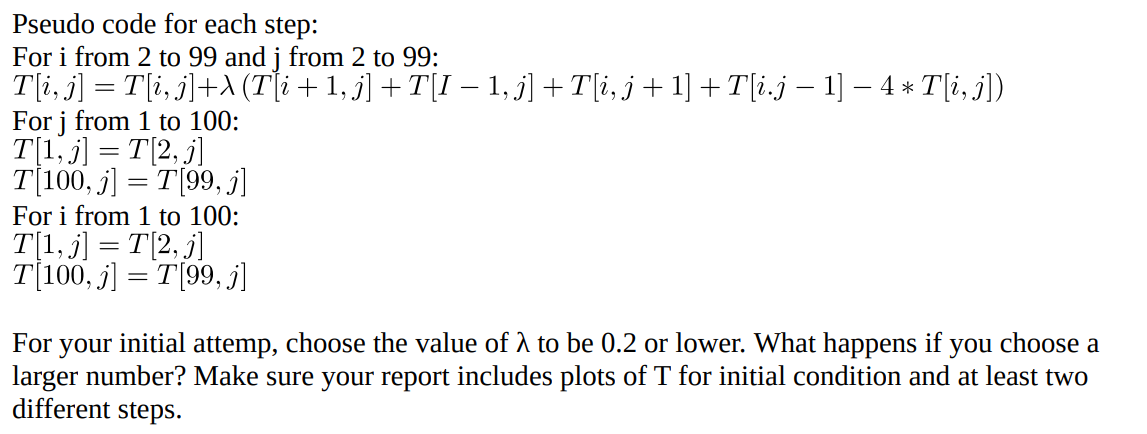

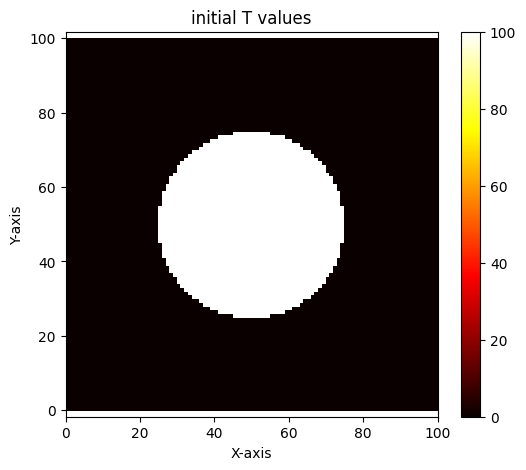

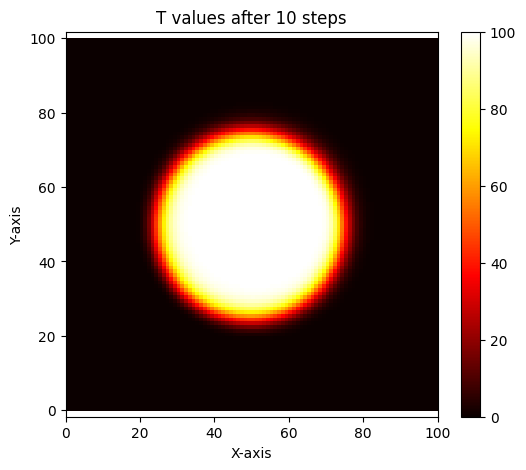

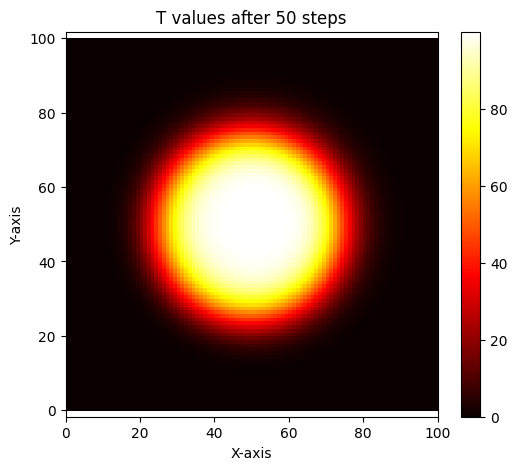

In [9]:
T = [[0 for _ in range(100)] for _ in range(100)]

for i in range(100):
    for j in range(100):
        if ((i - 49.5)**2 + (j - 49.5)**2 < 625):
            T[i][j] = 100

plt.figure(figsize=(6, 5))
plt.pcolor(T, cmap='hot', shading='auto')
plt.colorbar()
plt.title('initial T values')
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.axis('equal')
plt.show()

n = 50
lamda= 0.2
for k in range(n):

    for i in range(1, 99):
        for j in range(1, 99):
            T[i][j] = T[i][j] + lamda* (T[i + 1][j] + T[i - 1][j] + T[i][j + 1] + T[i][j - 1] - 4 * T[i][j])

    for j in range(100):
        T[0][j] = T[1][j]
        T[99][j] = T[98][j]


    for i in range(100):
        T[i][0] = T[i][1]
        T[i][99] = T[i][98]

    if (k == 9 or k == 49):
        plt.figure(figsize=(6, 5))
        plt.pcolor(T, cmap='hot', shading='auto')
        plt.colorbar()
        plt.title(f'T values after {k + 1} steps')
        plt.xlabel("X-axis")
        plt.ylabel("Y-axis")
        plt.axis('equal')
        plt.show()